In [1]:
import pandas as pd
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.compose import ColumnTransformer
import keras

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

import os

import math


from tensorflow.keras.utils import Sequence
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import datetime as dt

import warnings
warnings.filterwarnings('ignore')
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)  # turn off deprecation warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


2023-05-11 22:21:23.397821: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-11 22:21:23.463988: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-11 22:21:23.465033: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-11 22:21:24.452509: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
1==1

True

# Hour Dataset


In [3]:
df = pd.read_csv('../../data/latest_minute_final_ada.csv')

In [4]:
df

,Unnamed: 0,datetime,open,high,low,close,volume,close_time,qav,num_trades,...,macd_diff,macd_signal,mi,sma,wma,stc,trix,vi_pos,vi_neg,DATE
0,1798,1641121080000,1.3620,1.3630,1.3620,1.3630,3137.4,1641121139999,4274.95610,31,...,0.000574,0.000477,119.524462,1.359417,1.357818,99.218798,0.001200,1.069767,0.953488,2022-01-02
1,1799,1641121140000,1.3620,1.3630,1.3600,1.3610,119782.1,1641121199999,163062.21100,175,...,0.000519,0.000551,119.649105,1.359467,1.357843,99.609399,0.001199,1.022727,0.954545,2022-01-02
2,1800,1641121200000,1.3610,1.3620,1.3600,1.3600,22013.3,1641121259999,29963.17170,68,...,0.000426,0.000611,119.746935,1.359517,1.357863,99.463083,0.001198,1.022222,0.955556,2022-01-02
3,1801,1641121260000,1.3610,1.3620,1.3600,1.3610,59886.4,1641121319999,81500.97360,109,...,0.000388,0.000667,119.822475,1.359583,1.357889,99.731541,0.001197,1.021739,0.956522,2022-01-02
4,1802,1641121320000,1.3610,1.3630,1.3610,1.3620,18960.8,1641121379999,25825.17710,69,...,0.000395,0.000723,119.947903,1.359667,1.357919,99.865771,0.001196,1.042553,0.936170,2022-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681904,687486,1682267100000,0.3853,0.3856,0.3853,0.3855,43142.9,1682267159999,16628.15496,58,...,0.000219,-0.001512,123.674117,0.384943,0.388146,99.080837,-0.000492,0.977444,0.992481,2023-04-23
681905,687487,1682267160000,0.3855,0.3858,0.3854,0.3858,9896.9,1682267219999,3816.64933,103,...,0.000247,-0.001476,123.702030,0.384958,0.388126,99.540418,-0.000497,1.000000,0.954887,2023-04-23
681906,687488,1682267220000,0.3857,0.3859,0.3857,0.3858,17935.8,1682267279999,6920.09734,25,...,0.000269,-0.001438,123.686660,0.384973,0.388107,99.770209,-0.000501,1.000000,0.954887,2023-04-23
681907,687489,1682267280000,0.3859,0.3862,0.3858,0.3862,41410.7,1682267339999,15983.85534,50,...,0.000301,-0.001395,123.728593,0.384993,0.388090,99.885105,-0.000506,1.030075,0.924812,2023-04-23


In [5]:

df.drop(columns=['Unnamed: 0','datetime','DATE'], inplace=True)
df

,open,high,low,close,volume,close_time,qav,num_trades,taker_base_vol,taker_quote_vol,...,macd,macd_diff,macd_signal,mi,sma,wma,stc,trix,vi_pos,vi_neg
0,1.3620,1.3630,1.3620,1.3630,3137.4,1641121139999,4274.95610,31,1817.3,2476.97990,...,0.001050,0.000574,0.000477,119.524462,1.359417,1.357818,99.218798,0.001200,1.069767,0.953488
1,1.3620,1.3630,1.3600,1.3610,119782.1,1641121199999,163062.21100,175,19725.4,26850.47080,...,0.001069,0.000519,0.000551,119.649105,1.359467,1.357843,99.609399,0.001199,1.022727,0.954545
2,1.3610,1.3620,1.3600,1.3600,22013.3,1641121259999,29963.17170,68,9362.9,12748.19650,...,0.001037,0.000426,0.000611,119.746935,1.359517,1.357863,99.463083,0.001198,1.022222,0.955556
3,1.3610,1.3620,1.3600,1.3610,59886.4,1641121319999,81500.97360,109,35005.5,47643.13250,...,0.001055,0.000388,0.000667,119.822475,1.359583,1.357889,99.731541,0.001197,1.021739,0.956522
4,1.3610,1.3630,1.3610,1.3620,18960.8,1641121379999,25825.17710,69,15625.8,21284.65060,...,0.001118,0.000395,0.000723,119.947903,1.359667,1.357919,99.865771,0.001196,1.042553,0.936170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681904,0.3853,0.3856,0.3853,0.3855,43142.9,1682267159999,16628.15496,58,15352.2,5916.87593,...,-0.001293,0.000219,-0.001512,123.674117,0.384943,0.388146,99.080837,-0.000492,0.977444,0.992481
681905,0.3855,0.3858,0.3854,0.3858,9896.9,1682267219999,3816.64933,103,8941.1,3448.06893,...,-0.001229,0.000247,-0.001476,123.702030,0.384958,0.388126,99.540418,-0.000497,1.000000,0.954887
681906,0.3857,0.3859,0.3857,0.3858,17935.8,1682267279999,6920.09734,25,10350.8,3993.49563,...,-0.001170,0.000269,-0.001438,123.686660,0.384973,0.388107,99.770209,-0.000501,1.000000,0.954887
681907,0.3859,0.3862,0.3858,0.3862,41410.7,1682267339999,15983.85534,50,38280.2,14775.97768,...,-0.001094,0.000301,-0.001395,123.728593,0.384993,0.388090,99.885105,-0.000506,1.030075,0.924812


In [6]:
scaler = MinMaxScaler()


# Fit the scaler on your dataframe (let's say it's called df)
df_normalized = scaler.fit_transform(df)

# Convert the normalized data back to a dataframe
df_normalized = pd.DataFrame(df_normalized, columns=df.columns)

In [7]:

# Convert the DataFrame to a NumPy array
raw_data = df_normalized.values
close = df_normalized['close'].values
close = close.reshape((len(close),1))
# Display the NumPy array
print(type(raw_data))
print(raw_data.shape)
print(close.shape)

<class 'numpy.ndarray'>
(681909, 74)
(681909, 1)


## Prepare Model

In [8]:
print('Prep Data')
num_train_samples = int(0.6 * len(raw_data))
num_val_samples = int(0.25 * len(raw_data))
num_test_samples = len(raw_data) - num_train_samples - num_val_samples
print("num_train_samples:", num_train_samples)
print("num_val_samples:", num_val_samples)
print("num_test_samples:", num_test_samples)


Prep Data
num_train_samples: 409145
num_val_samples: 170477
num_test_samples: 102287


In [9]:
# Set Parameters

# delay: time in future that will be predicted
delay = 60


# sampling rate: period between timesteps within the sequence
# Sequence with rate=1 : t1,t2...tn
# Sequence with rate=3 : t1,t3...tn*3
sampling_rate = 5

# sequence length: sequence lenght of each sample 
sequence_length = 6 * 2 * 24


# sequence_stride: period between sequences
# First sequence starts at t0
# Second sequence will start at t1 with sequence_stride=1 or at t5 with sequence_stride=5
sequence_stride = 1

#batch_size: Number of timeseries samples in each batch (except maybe the last one). 
#If None, the data will not be batched (the dataset will yield individual samples).
# Huge impact in performance.
# Tip, should be multiple of 8
batch_size = 64

# Understanding our parameters
msg = f"The timeseries will consist of batches containing {batch_size} sequences of {sequence_length} samples."

msg += f"\nFinally our target is {delay} timesteps in the future, and will have data from {sequence_length * sampling_rate} timesteps in the past"
print(msg)

train_dataset = keras.preprocessing.timeseries_dataset_from_array(
                        raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=sampling_rate,
                    sequence_stride=sequence_stride,
                    sequence_length=sequence_length,
                    shuffle=False, # Shouldn't the shuffle be set to 0?
                    seed=33,
                    batch_size=batch_size,
                    start_index=0,
                    end_index=num_train_samples)

print("Done Train")

val_dataset = keras.preprocessing.timeseries_dataset_from_array(
                    raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=sampling_rate,
                    sequence_stride=sequence_stride,
                    sequence_length=sequence_length,
                    shuffle=False,
                    seed=33,
                    batch_size=batch_size,
                    start_index=num_train_samples,
                    end_index=num_train_samples + num_val_samples)

print("Done Validation")      

test_dataset = keras.preprocessing.timeseries_dataset_from_array(
                    raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=sampling_rate,
                    sequence_stride=sequence_stride,
                    sequence_length=sequence_length,
                    shuffle=False,
                    seed=33,
                    batch_size=batch_size,
                    start_index=num_train_samples + num_val_samples)

print("Done Test")

The timeseries will consist of batches containing 64 sequences of 288 samples.
Finally our target is 60 timesteps in the future, and will have data from 1440 timesteps in the past


2023-05-11 22:21:37.374493: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 242213840 exceeds 10% of free system memory.


Done Train
Done Validation
Done Test


In [10]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(32)(inputs) 


outputs = layers.Dense(1)(x) #simoidal #con n clases neurnas y funcion softmax
model = keras.Model(inputs, outputs)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

callbacks = [
    keras.callbacks.ModelCheckpoint("models/lstm",
   save_best_only=True) 
]

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

history = model.fit(train_dataset,
                    epochs=100,
                    validation_data=val_dataset,
                    callbacks=[callbacks, early_stopping])

# Save the trained model to a file
model.save('lstm_model_1_ahead.h5')

2023-05-11 22:21:38.303274: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-11 22:21:38.305038: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-11 22:21:38.306297: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/100


2023-05-11 22:21:38.602460: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]
2023-05-11 22:21:38.603007: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [407706]
	 [[{{node Placeholder/_28}}]]
2023-05-11 22:21:38.984833: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype in

6371/6371 [==============================] - ETA: 0s - loss: 4.6018e-04 - mae: 0.0106

2023-05-11 22:33:26.788365: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype double and shape [170477,1]
	 [[{{node Placeholder/_20}}]]
2023-05-11 22:33:26.788936: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [169038]
	 [[{{node Placeholder/_28}}]]
2023-05-11 22:33:27.151083: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/sp

6371/6371 [==============================] - 811s 127ms/step - loss: 4.6018e-04 - mae: 0.0106 - val_loss: 0.0020 - val_mae: 0.0365
Epoch 2/100
6371/6371 [==============================] - ETA: 0s - loss: 4.2446e-04 - mae: 0.0066

2023-05-11 22:48:41.955149: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-11 22:48:41.957014: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-11 22:48:41.958471: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

6371/6371 [==============================] - 816s 128ms/step - loss: 4.2446e-04 - mae: 0.0066 - val_loss: 0.0016 - val_mae: 0.0328
Epoch 3/100
6371/6371 [==============================] - ETA: 0s - loss: 4.3977e-04 - mae: 0.0067

2023-05-11 23:02:10.407735: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-11 23:02:10.409739: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-11 23:02:10.411200: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

6371/6371 [==============================] - 808s 127ms/step - loss: 4.3977e-04 - mae: 0.0067 - val_loss: 0.0015 - val_mae: 0.0321
Epoch 4/100
6371/6371 [==============================] - ETA: 0s - loss: 4.3791e-04 - mae: 0.0068

2023-05-11 23:15:38.636529: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-11 23:15:38.638480: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-11 23:15:38.639947: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

6371/6371 [==============================] - 809s 127ms/step - loss: 4.3791e-04 - mae: 0.0068 - val_loss: 0.0014 - val_mae: 0.0310
Epoch 5/100
6371/6371 [==============================] - 792s 124ms/step - loss: 4.1028e-04 - mae: 0.0069 - val_loss: 0.0014 - val_mae: 0.0309
Epoch 6/100
6371/6371 [==============================] - 798s 125ms/step - loss: 3.6449e-04 - mae: 0.0068 - val_loss: 0.0017 - val_mae: 0.0335
Epoch 7/100
6371/6371 [==============================] - ETA: 0s - loss: 3.5128e-04 - mae: 0.0068

2023-05-11 23:55:38.083448: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-11 23:55:38.085506: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-11 23:55:38.086961: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

6371/6371 [==============================] - 809s 127ms/step - loss: 3.5128e-04 - mae: 0.0068 - val_loss: 0.0012 - val_mae: 0.0284
Epoch 8/100
6371/6371 [==============================] - ETA: 0s - loss: 3.2202e-04 - mae: 0.0067

2023-05-12 00:09:51.920161: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-12 00:09:51.921949: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-12 00:09:51.923409: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

6371/6371 [==============================] - 800s 126ms/step - loss: 3.2202e-04 - mae: 0.0067 - val_loss: 0.0012 - val_mae: 0.0279
Epoch 9/100
6371/6371 [==============================] - ETA: 0s - loss: 3.0588e-04 - mae: 0.0066

2023-05-12 00:23:18.938236: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-12 00:23:18.940127: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-12 00:23:18.941608: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

6371/6371 [==============================] - 808s 127ms/step - loss: 3.0588e-04 - mae: 0.0066 - val_loss: 0.0011 - val_mae: 0.0270
Epoch 10/100
6371/6371 [==============================] - ETA: 0s - loss: 2.6564e-04 - mae: 0.0066

2023-05-12 00:36:56.559815: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-12 00:36:56.561801: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-12 00:36:56.563209: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

6371/6371 [==============================] - 817s 128ms/step - loss: 2.6564e-04 - mae: 0.0066 - val_loss: 8.9151e-04 - val_mae: 0.0246
Epoch 11/100
6371/6371 [==============================] - ETA: 0s - loss: 1.9883e-04 - mae: 0.0063

2023-05-12 00:50:31.965971: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-12 00:50:31.967884: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-12 00:50:31.969259: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

6371/6371 [==============================] - 816s 128ms/step - loss: 1.9883e-04 - mae: 0.0063 - val_loss: 8.1273e-04 - val_mae: 0.0236
Epoch 12/100
6371/6371 [==============================] - ETA: 0s - loss: 1.8331e-04 - mae: 0.0061

2023-05-12 01:03:55.460951: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-12 01:03:55.462892: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-12 01:03:55.464400: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

6371/6371 [==============================] - 803s 126ms/step - loss: 1.8331e-04 - mae: 0.0061 - val_loss: 7.4903e-04 - val_mae: 0.0227
Epoch 13/100
6371/6371 [==============================] - ETA: 0s - loss: 1.6710e-04 - mae: 0.0059

2023-05-12 01:17:20.553360: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-12 01:17:20.555264: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-12 01:17:20.556822: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

6371/6371 [==============================] - 805s 126ms/step - loss: 1.6710e-04 - mae: 0.0059 - val_loss: 7.2313e-04 - val_mae: 0.0223
Epoch 14/100
6371/6371 [==============================] - ETA: 0s - loss: 1.5745e-04 - mae: 0.0059

2023-05-12 01:30:42.559524: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-12 01:30:42.561432: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-12 01:30:42.562898: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

6371/6371 [==============================] - 802s 126ms/step - loss: 1.5745e-04 - mae: 0.0059 - val_loss: 7.2306e-04 - val_mae: 0.0222
Epoch 15/100
6371/6371 [==============================] - 799s 125ms/step - loss: 1.4589e-04 - mae: 0.0057 - val_loss: 7.2388e-04 - val_mae: 0.0222
Epoch 16/100
6371/6371 [==============================] - 803s 126ms/step - loss: 1.3852e-04 - mae: 0.0057 - val_loss: 7.3191e-04 - val_mae: 0.0223
Epoch 17/100
6371/6371 [==============================] - 801s 126ms/step - loss: 1.3546e-04 - mae: 0.0056 - val_loss: 7.4340e-04 - val_mae: 0.0224
Epoch 18/100
6371/6371 [==============================] - 802s 126ms/step - loss: 1.2180e-04 - mae: 0.0055 - val_loss: 7.6431e-04 - val_mae: 0.0227
Epoch 19/100
6371/6371 [==============================] - 801s 126ms/step - loss: 1.1573e-04 - mae: 0.0055 - val_loss: 7.8195e-04 - val_mae: 0.0229


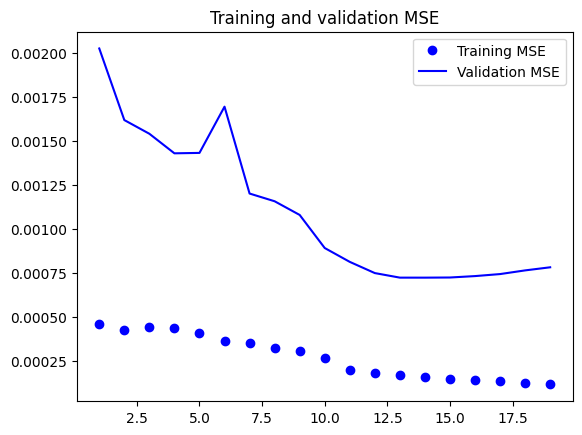

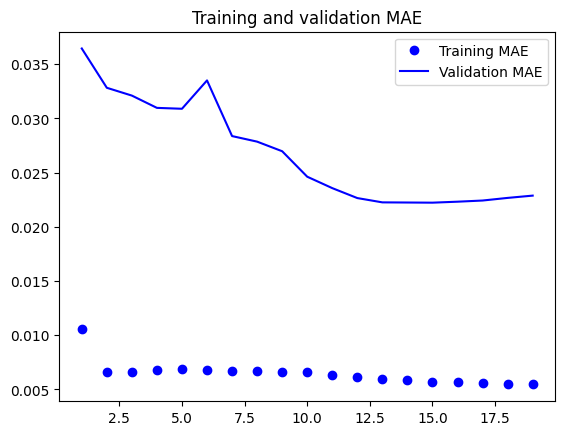

In [11]:
import matplotlib.pyplot as plt
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MSE")
plt.plot(epochs, val_loss, "b", label="Validation MSE")
plt.title("Training and validation MSE")
plt.legend()
plt.show()
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

## 3 Hour Ahead

In [12]:
# Set Parameters

# delay: time in future that will be predicted
delay = 60 * 3


# sampling rate: period between timesteps within the sequence
# Sequence with rate=1 : t1,t2...tn
# Sequence with rate=3 : t1,t3...tn*3
sampling_rate = 15

# sequence length: sequence lenght of each sample 
sequence_length = 6 * 3 * 24


# sequence_stride: period between sequences
# First sequence starts at t0
# Second sequence will start at t1 with sequence_stride=1 or at t5 with sequence_stride=5
sequence_stride = 5

#batch_size: Number of timeseries samples in each batch (except maybe the last one). 
#If None, the data will not be batched (the dataset will yield individual samples).
# Huge impact in performance.
# Tip, should be multiple of 8
batch_size = 32

# Understanding our parameters
msg = f"The timeseries will consist of batches containing {batch_size} sequences of {sequence_length} samples."

msg += f"\nFinally our target is {delay} timesteps in the future, and will have data from {sequence_length * sampling_rate} timesteps in the past"
print(msg)

train_dataset = keras.preprocessing.timeseries_dataset_from_array(
                        raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=sampling_rate,
                    sequence_stride=sequence_stride,
                    sequence_length=sequence_length,
                    shuffle=False, # Shouldn't the shuffle be set to 0?
                    seed=33,
                    batch_size=batch_size,
                    start_index=0,
                    end_index=num_train_samples)

print("Done Train")

val_dataset = keras.preprocessing.timeseries_dataset_from_array(
                    raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=sampling_rate,
                    sequence_stride=sequence_stride,
                    sequence_length=sequence_length,
                    shuffle=False,
                    seed=33,
                    batch_size=batch_size,
                    start_index=num_train_samples,
                    end_index=num_train_samples + num_val_samples)

print("Done Validation")      

test_dataset = keras.preprocessing.timeseries_dataset_from_array(
                    raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=sampling_rate,
                    sequence_stride=sequence_stride,
                    sequence_length=sequence_length,
                    shuffle=False,
                    seed=33,
                    batch_size=batch_size,
                    start_index=num_train_samples + num_val_samples)

print("Done Test")

The timeseries will consist of batches containing 32 sequences of 432 samples.
Finally our target is 180 timesteps in the future, and will have data from 6480 timesteps in the past


2023-05-12 02:37:33.602296: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 242213840 exceeds 10% of free system memory.


Done Train
Done Validation
Done Test


In [13]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(32)(inputs) 


outputs = layers.Dense(1)(x) #simoidal #con n clases neurnas y funcion softmax
model = keras.Model(inputs, outputs)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

callbacks = [
    keras.callbacks.ModelCheckpoint("models/lstm",
   save_best_only=True) 
]

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

history = model.fit(train_dataset,
                    epochs=100,
                    validation_data=val_dataset,
                    callbacks=[callbacks, early_stopping])

# Save the trained model to a file
model.save('lstm_model_3_ahead.h5')

2023-05-12 02:37:34.747212: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-12 02:37:34.749046: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-12 02:37:34.750484: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/100


2023-05-12 02:37:35.049622: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [80534]
	 [[{{node Placeholder/_28}}]]
2023-05-12 02:37:35.050266: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]
2023-05-12 02:37:35.445573: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int

2517/2517 [==============================] - ETA: 0s - loss: 0.0011 - mae: 0.0143

2023-05-12 02:43:42.168766: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]
2023-05-12 02:43:42.169325: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype double and shape [170477,1]
	 [[{{node Placeholder/_20}}]]
2023-05-12 02:43:42.552159: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype

2517/2517 [==============================] - 416s 164ms/step - loss: 0.0011 - mae: 0.0143 - val_loss: 0.0046 - val_mae: 0.0609
Epoch 2/100
2517/2517 [==============================] - ETA: 0s - loss: 8.9474e-04 - mae: 0.0096

2023-05-12 02:51:20.137621: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-12 02:51:20.139673: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-12 02:51:20.141168: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2517/2517 [==============================] - 413s 164ms/step - loss: 8.9474e-04 - mae: 0.0096 - val_loss: 0.0027 - val_mae: 0.0445
Epoch 3/100
2517/2517 [==============================] - 408s 162ms/step - loss: 8.9705e-04 - mae: 0.0096 - val_loss: 0.0032 - val_mae: 0.0497
Epoch 4/100
2517/2517 [==============================] - 407s 162ms/step - loss: 7.8148e-04 - mae: 0.0092 - val_loss: 0.0033 - val_mae: 0.0511
Epoch 5/100
2517/2517 [==============================] - 409s 163ms/step - loss: 7.7405e-04 - mae: 0.0092 - val_loss: 0.0031 - val_mae: 0.0488
Epoch 6/100
2517/2517 [==============================] - 415s 165ms/step - loss: 7.7228e-04 - mae: 0.0091 - val_loss: 0.0036 - val_mae: 0.0534
Epoch 7/100
2517/2517 [==============================] - 410s 163ms/step - loss: 7.2137e-04 - mae: 0.0092 - val_loss: 0.0032 - val_mae: 0.0506


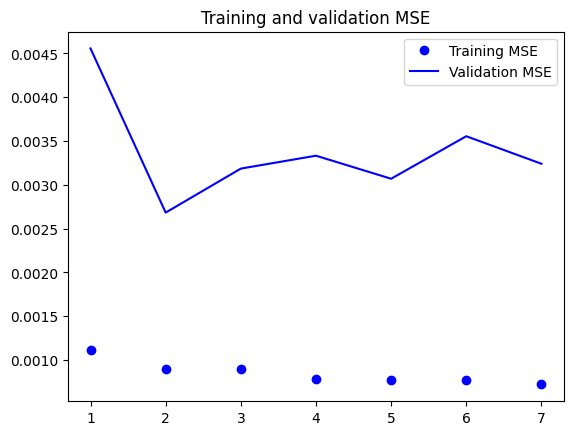

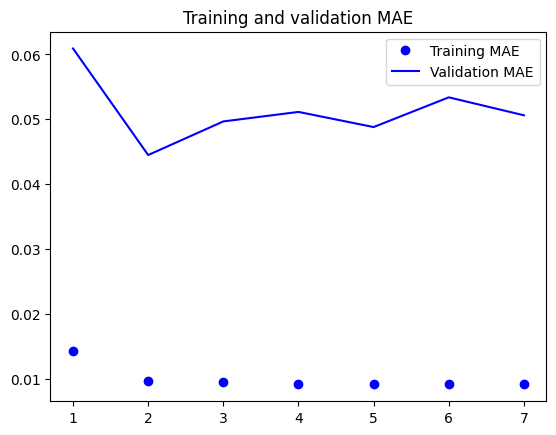

In [14]:

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MSE")
plt.plot(epochs, val_loss, "b", label="Validation MSE")
plt.title("Training and validation MSE")
plt.legend()
plt.show()
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

## 6 Hours Ahead

In [15]:
# Set Parameters

# delay: time in future that will be predicted
delay = 60 * 6


# sampling rate: period between timesteps within the sequence
# Sequence with rate=1 : t1,t2...tn
# Sequence with rate=3 : t1,t3...tn*3
sampling_rate = 20

# sequence length: sequence lenght of each sample 
sequence_length = 6 * 3 * 24


# sequence_stride: period between sequences
# First sequence starts at t0
# Second sequence will start at t1 with sequence_stride=1 or at t5 with sequence_stride=5
sequence_stride = 1

#batch_size: Number of timeseries samples in each batch (except maybe the last one). 
#If None, the data will not be batched (the dataset will yield individual samples).
# Huge impact in performance.
# Tip, should be multiple of 8
batch_size = 32

# Understanding our parameters
msg = f"The timeseries will consist of batches containing {batch_size} sequences of {sequence_length} samples."

msg += f"\nFinally our target is {delay} timesteps in the future, and will have data from {sequence_length * sampling_rate} timesteps in the past"
print(msg)

train_dataset = keras.preprocessing.timeseries_dataset_from_array(
                        raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=sampling_rate,
                    sequence_stride=sequence_stride,
                    sequence_length=sequence_length,
                    shuffle=False, # Shouldn't the shuffle be set to 0?
                    seed=33,
                    batch_size=batch_size,
                    start_index=0,
                    end_index=num_train_samples)

print("Done Train")

val_dataset = keras.preprocessing.timeseries_dataset_from_array(
                    raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=sampling_rate,
                    sequence_stride=sequence_stride,
                    sequence_length=sequence_length,
                    shuffle=False,
                    seed=33,
                    batch_size=batch_size,
                    start_index=num_train_samples,
                    end_index=num_train_samples + num_val_samples)

print("Done Validation")      

test_dataset = keras.preprocessing.timeseries_dataset_from_array(
                    raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=sampling_rate,
                    sequence_stride=sequence_stride,
                    sequence_length=sequence_length,
                    shuffle=False,
                    seed=33,
                    batch_size=batch_size,
                    start_index=num_train_samples + num_val_samples)

print("Done Test")

The timeseries will consist of batches containing 32 sequences of 432 samples.
Finally our target is 360 timesteps in the future, and will have data from 8640 timesteps in the past


2023-05-12 03:26:06.314278: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 242213840 exceeds 10% of free system memory.


Done Train
Done Validation
Done Test


In [16]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(32)(inputs) 


outputs = layers.Dense(1)(x) #simoidal #con n clases neurnas y funcion softmax
model = keras.Model(inputs, outputs)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

callbacks = [
    keras.callbacks.ModelCheckpoint("models/lstm",
   save_best_only=True) 
]

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

history = model.fit(train_dataset,
                    epochs=100,
                    validation_data=val_dataset,
                    callbacks=[callbacks, early_stopping])

# Save the trained model to a file
model.save('lstm_model_6_ahead.h5')

2023-05-12 03:26:07.378939: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-12 03:26:07.381036: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-12 03:26:07.382570: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/100


2023-05-12 03:26:07.794911: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [400506]
	 [[{{node Placeholder/_28}}]]
2023-05-12 03:26:07.797082: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype double and shape [409145,1]
	 [[{{node Placeholder/_20}}]]
2023-05-12 03:26:08.178616: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/sp

12516/12516 [==============================] - ETA: 0s - loss: 2.8122e-04 - mae: 0.0081

2023-05-12 03:56:44.756708: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [161838]
	 [[{{node Placeholder/_8}}]]
2023-05-12 03:56:44.757634: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]
2023-05-12 03:56:45.116689: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int3

12516/12516 [==============================] - 2049s 164ms/step - loss: 2.8122e-04 - mae: 0.0081 - val_loss: 0.0052 - val_mae: 0.0641
Epoch 2/100
12516/12516 [==============================] - ETA: 0s - loss: 2.7872e-04 - mae: 0.0051

2023-05-12 04:34:25.095008: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-12 04:34:25.096807: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-12 04:34:25.098273: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

12516/12516 [==============================] - 2052s 164ms/step - loss: 2.7872e-04 - mae: 0.0051 - val_loss: 0.0051 - val_mae: 0.0645
Epoch 3/100
12516/12516 [==============================] - ETA: 0s - loss: 2.6812e-04 - mae: 0.0051

2023-05-12 05:08:23.689493: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-12 05:08:23.691390: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-12 05:08:23.692884: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

12516/12516 [==============================] - 2028s 162ms/step - loss: 2.6812e-04 - mae: 0.0051 - val_loss: 0.0050 - val_mae: 0.0640
Epoch 4/100
12516/12516 [==============================] - ETA: 0s - loss: 2.7551e-04 - mae: 0.0053

2023-05-12 05:42:27.818750: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-12 05:42:27.820735: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-12 05:42:27.822181: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

12516/12516 [==============================] - 2044s 163ms/step - loss: 2.7551e-04 - mae: 0.0053 - val_loss: 0.0048 - val_mae: 0.0627
Epoch 5/100
12516/12516 [==============================] - ETA: 0s - loss: 2.8703e-04 - mae: 0.0055

2023-05-12 06:16:41.282934: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-12 06:16:41.284873: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-12 06:16:41.286430: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

12516/12516 [==============================] - 2036s 163ms/step - loss: 2.8703e-04 - mae: 0.0055 - val_loss: 0.0048 - val_mae: 0.0625
Epoch 6/100
12516/12516 [==============================] - 2027s 162ms/step - loss: 3.1379e-04 - mae: 0.0056 - val_loss: 0.0050 - val_mae: 0.0634
Epoch 7/100
12516/12516 [==============================] - ETA: 0s - loss: 3.0313e-04 - mae: 0.0058

2023-05-12 07:24:28.387055: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-12 07:24:28.389301: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-12 07:24:28.390888: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

12516/12516 [==============================] - 2040s 163ms/step - loss: 3.0313e-04 - mae: 0.0058 - val_loss: 0.0046 - val_mae: 0.0612
Epoch 8/100
12516/12516 [==============================] - ETA: 0s - loss: 2.6254e-04 - mae: 0.0057

2023-05-12 07:58:27.556040: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-12 07:58:27.557955: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-12 07:58:27.559417: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

12516/12516 [==============================] - 2039s 163ms/step - loss: 2.6254e-04 - mae: 0.0057 - val_loss: 0.0046 - val_mae: 0.0611
Epoch 9/100
12516/12516 [==============================] - ETA: 0s - loss: 2.5754e-04 - mae: 0.0057

2023-05-12 08:32:32.507276: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-12 08:32:32.509379: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-12 08:32:32.510873: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

12516/12516 [==============================] - 2045s 163ms/step - loss: 2.5754e-04 - mae: 0.0057 - val_loss: 0.0046 - val_mae: 0.0608
Epoch 10/100
12516/12516 [==============================] - 2046s 163ms/step - loss: 2.3508e-04 - mae: 0.0056 - val_loss: 0.0046 - val_mae: 0.0613
Epoch 11/100
12516/12516 [==============================] - ETA: 0s - loss: 2.2461e-04 - mae: 0.0056

2023-05-12 09:40:28.522037: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-12 09:40:28.523918: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-12 09:40:28.525420: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

12516/12516 [==============================] - 2030s 162ms/step - loss: 2.2461e-04 - mae: 0.0056 - val_loss: 0.0045 - val_mae: 0.0601
Epoch 12/100
12516/12516 [==============================] - ETA: 0s - loss: 2.2369e-04 - mae: 0.0055

2023-05-12 10:14:25.619468: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-12 10:14:25.621419: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-12 10:14:25.622967: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

12516/12516 [==============================] - 2037s 163ms/step - loss: 2.2369e-04 - mae: 0.0055 - val_loss: 0.0044 - val_mae: 0.0596
Epoch 13/100
12516/12516 [==============================] - ETA: 0s - loss: 2.1016e-04 - mae: 0.0055

2023-05-12 10:48:17.490781: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-12 10:48:17.492753: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-12 10:48:17.494294: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

12516/12516 [==============================] - 2032s 162ms/step - loss: 2.1016e-04 - mae: 0.0055 - val_loss: 0.0043 - val_mae: 0.0585
Epoch 14/100
12516/12516 [==============================] - ETA: 0s - loss: 2.0089e-04 - mae: 0.0054

2023-05-12 11:21:58.025420: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-12 11:21:58.027501: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-12 11:21:58.028872: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

12516/12516 [==============================] - 2020s 161ms/step - loss: 2.0089e-04 - mae: 0.0054 - val_loss: 0.0039 - val_mae: 0.0558
Epoch 15/100
12516/12516 [==============================] - ETA: 0s - loss: 1.8069e-04 - mae: 0.0053

2023-05-12 11:55:52.314671: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-12 11:55:52.316505: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-12 11:55:52.317910: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

12516/12516 [==============================] - 2035s 163ms/step - loss: 1.8069e-04 - mae: 0.0053 - val_loss: 0.0036 - val_mae: 0.0535
Epoch 16/100
12516/12516 [==============================] - ETA: 0s - loss: 1.6509e-04 - mae: 0.0052

2023-05-12 12:29:43.377849: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-12 12:29:43.379938: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-12 12:29:43.381426: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

12516/12516 [==============================] - 2031s 162ms/step - loss: 1.6509e-04 - mae: 0.0052 - val_loss: 0.0033 - val_mae: 0.0504
Epoch 17/100
12516/12516 [==============================] - ETA: 0s - loss: 1.4358e-04 - mae: 0.0050

2023-05-12 13:03:26.743969: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-12 13:03:26.746021: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-12 13:03:26.747464: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

12516/12516 [==============================] - 2023s 162ms/step - loss: 1.4358e-04 - mae: 0.0050 - val_loss: 0.0032 - val_mae: 0.0497
Epoch 18/100
12516/12516 [==============================] - ETA: 0s - loss: 1.3866e-04 - mae: 0.0049

2023-05-12 13:37:27.329197: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-12 13:37:27.331003: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-12 13:37:27.332400: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

12516/12516 [==============================] - 2041s 163ms/step - loss: 1.3866e-04 - mae: 0.0049 - val_loss: 0.0031 - val_mae: 0.0494
Epoch 19/100
12516/12516 [==============================] - ETA: 0s - loss: 1.2823e-04 - mae: 0.0049

2023-05-12 14:11:24.508209: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-12 14:11:24.510342: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-12 14:11:24.511778: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

12516/12516 [==============================] - 2037s 163ms/step - loss: 1.2823e-04 - mae: 0.0049 - val_loss: 0.0031 - val_mae: 0.0487
Epoch 20/100
12516/12516 [==============================] - ETA: 0s - loss: 1.2028e-04 - mae: 0.0048

2023-05-12 14:45:16.888825: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-12 14:45:16.890754: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-12 14:45:16.892199: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

12516/12516 [==============================] - 2032s 162ms/step - loss: 1.2028e-04 - mae: 0.0048 - val_loss: 0.0030 - val_mae: 0.0487
Epoch 21/100
12516/12516 [==============================] - 2025s 162ms/step - loss: 1.0428e-04 - mae: 0.0046 - val_loss: 0.0032 - val_mae: 0.0506
Epoch 22/100
12516/12516 [==============================] - 2014s 161ms/step - loss: 1.0524e-04 - mae: 0.0046 - val_loss: 0.0031 - val_mae: 0.0499
Epoch 23/100
12516/12516 [==============================] - 2038s 163ms/step - loss: 9.2936e-05 - mae: 0.0044 - val_loss: 0.0032 - val_mae: 0.0502
Epoch 24/100
12516/12516 [==============================] - ETA: 0s - loss: 9.1988e-05 - mae: 0.0045

2023-05-12 17:00:51.148085: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-12 17:00:51.150325: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-12 17:00:51.151815: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

12516/12516 [==============================] - 2033s 162ms/step - loss: 9.1988e-05 - mae: 0.0045 - val_loss: 0.0029 - val_mae: 0.0474
Epoch 25/100
12516/12516 [==============================] - 2037s 163ms/step - loss: 9.1153e-05 - mae: 0.0044 - val_loss: 0.0029 - val_mae: 0.0482
Epoch 26/100
12516/12516 [==============================] - 2042s 163ms/step - loss: 8.7710e-05 - mae: 0.0043 - val_loss: 0.0030 - val_mae: 0.0483
Epoch 27/100
12516/12516 [==============================] - 2030s 162ms/step - loss: 8.7058e-05 - mae: 0.0044 - val_loss: 0.0029 - val_mae: 0.0475
Epoch 28/100
12516/12516 [==============================] - 2028s 162ms/step - loss: 8.5486e-05 - mae: 0.0044 - val_loss: 0.0030 - val_mae: 0.0483
Epoch 29/100
12516/12516 [==============================] - 2020s 161ms/step - loss: 9.0347e-05 - mae: 0.0044 - val_loss: 0.0030 - val_mae: 0.0483


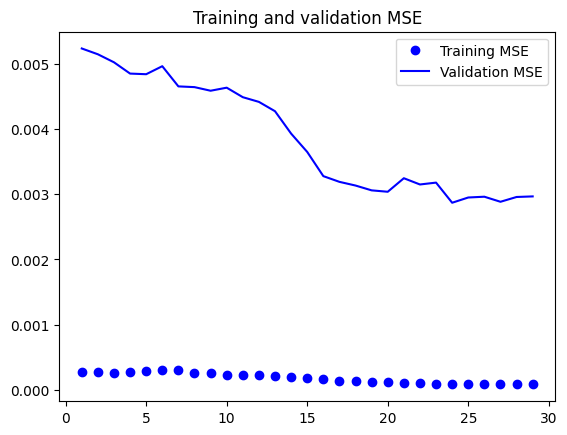

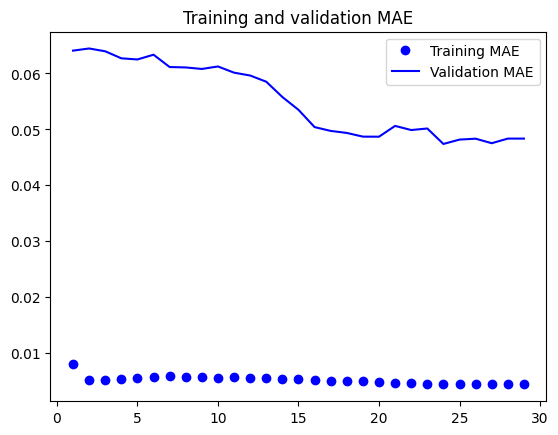

In [17]:

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MSE")
plt.plot(epochs, val_loss, "b", label="Validation MSE")
plt.title("Training and validation MSE")
plt.legend()
plt.show()
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

## 12 Ahead

In [18]:
# Set Parameters

# delay: time in future that will be predicted
delay = 60 * 12


# sampling rate: period between timesteps within the sequence
# Sequence with rate=1 : t1,t2...tn
# Sequence with rate=3 : t1,t3...tn*3
sampling_rate = 30

# sequence length: sequence lenght of each sample 
sequence_length = 6 * 24


# sequence_stride: period between sequences
# First sequence starts at t0
# Second sequence will start at t1 with sequence_stride=1 or at t5 with sequence_stride=5
sequence_stride = 1

#batch_size: Number of timeseries samples in each batch (except maybe the last one). 
#If None, the data will not be batched (the dataset will yield individual samples).
# Huge impact in performance.
# Tip, should be multiple of 8
batch_size = 32

# Understanding our parameters
msg = f"The timeseries will consist of batches containing {batch_size} sequences of {sequence_length} samples."

msg += f"\nFinally our target is {delay} timesteps in the future, and will have data from {sequence_length * sampling_rate} timesteps in the past"
print(msg)

train_dataset = keras.preprocessing.timeseries_dataset_from_array(
                        raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=sampling_rate,
                    sequence_stride=sequence_stride,
                    sequence_length=sequence_length,
                    shuffle=False, # Shouldn't the shuffle be set to 0?
                    seed=33,
                    batch_size=batch_size,
                    start_index=0,
                    end_index=num_train_samples)

print("Done Train")

val_dataset = keras.preprocessing.timeseries_dataset_from_array(
                    raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=sampling_rate,
                    sequence_stride=sequence_stride,
                    sequence_length=sequence_length,
                    shuffle=False,
                    seed=33,
                    batch_size=batch_size,
                    start_index=num_train_samples,
                    end_index=num_train_samples + num_val_samples)

print("Done Validation")      

test_dataset = keras.preprocessing.timeseries_dataset_from_array(
                    raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=sampling_rate,
                    sequence_stride=sequence_stride,
                    sequence_length=sequence_length,
                    shuffle=False,
                    seed=33,
                    batch_size=batch_size,
                    start_index=num_train_samples + num_val_samples)

print("Done Test")

The timeseries will consist of batches containing 32 sequences of 144 samples.
Finally our target is 720 timesteps in the future, and will have data from 4320 timesteps in the past
Done Train
Done Validation
Done Test


In [19]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(32)(inputs) 


outputs = layers.Dense(1)(x) #simoidal #con n clases neurnas y funcion softmax
model = keras.Model(inputs, outputs)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

callbacks = [
    keras.callbacks.ModelCheckpoint("models/lstm",
   save_best_only=True) 
]

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

history = model.fit(train_dataset,
                    epochs=100,
                    validation_data=val_dataset,
                    callbacks=[callbacks, early_stopping])

# Save the trained model to a file
model.save('lstm_model_12_ahead.h5')

2023-05-12 19:50:47.758131: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-12 19:50:47.759895: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-12 19:50:47.761171: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/100


2023-05-12 19:50:48.042621: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]
2023-05-12 19:50:48.043175: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [404826]
	 [[{{node Placeholder/_28}}]]
2023-05-12 19:50:48.394801: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype in

12651/12651 [==============================] - ETA: 0s - loss: 2.2775e-04 - mae: 0.0084

2023-05-12 20:01:25.841219: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [166158]
	 [[{{node Placeholder/_28}}]]
2023-05-12 20:01:25.842060: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]
2023-05-12 20:01:26.191095: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype in

12651/12651 [==============================] - 719s 57ms/step - loss: 2.2775e-04 - mae: 0.0084 - val_loss: 0.0030 - val_mae: 0.0453
Epoch 2/100
12651/12651 [==============================] - ETA: 0s - loss: 2.6320e-04 - mae: 0.0049

2023-05-12 20:14:43.891252: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-12 20:14:43.893100: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-12 20:14:43.894536: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

12651/12651 [==============================] - 721s 57ms/step - loss: 2.6320e-04 - mae: 0.0049 - val_loss: 0.0024 - val_mae: 0.0405
Epoch 3/100
12651/12651 [==============================] - ETA: 0s - loss: 2.3900e-04 - mae: 0.0049

2023-05-12 20:26:36.099713: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-12 20:26:36.101505: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-12 20:26:36.102951: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

12651/12651 [==============================] - 712s 56ms/step - loss: 2.3900e-04 - mae: 0.0049 - val_loss: 0.0022 - val_mae: 0.0388
Epoch 4/100
12651/12651 [==============================] - ETA: 0s - loss: 2.2807e-04 - mae: 0.0050

2023-05-12 20:38:36.785856: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-12 20:38:36.787615: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-12 20:38:36.789022: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

12651/12651 [==============================] - 721s 57ms/step - loss: 2.2807e-04 - mae: 0.0050 - val_loss: 0.0021 - val_mae: 0.0379
Epoch 5/100
12651/12651 [==============================] - ETA: 0s - loss: 2.4545e-04 - mae: 0.0053

2023-05-12 20:50:26.091245: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-12 20:50:26.093052: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-12 20:50:26.094520: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

12651/12651 [==============================] - 709s 56ms/step - loss: 2.4545e-04 - mae: 0.0053 - val_loss: 0.0020 - val_mae: 0.0373
Epoch 6/100
12650/12651 [============================>.] - ETA: 0s - loss: 2.4966e-04 - mae: 0.0053

2023-05-12 21:02:58.005792: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-12 21:02:58.007926: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-12 21:02:58.009362: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

12651/12651 [==============================] - 719s 57ms/step - loss: 2.4964e-04 - mae: 0.0053 - val_loss: 0.0020 - val_mae: 0.0366
Epoch 7/100
12650/12651 [============================>.] - ETA: 0s - loss: 2.3590e-04 - mae: 0.0053

2023-05-12 21:14:52.822436: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-12 21:14:52.824496: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-12 21:14:52.825964: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

12651/12651 [==============================] - 715s 56ms/step - loss: 2.3588e-04 - mae: 0.0053 - val_loss: 0.0018 - val_mae: 0.0354
Epoch 8/100
12651/12651 [==============================] - ETA: 0s - loss: 2.2317e-04 - mae: 0.0053

2023-05-12 21:26:51.856242: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-12 21:26:51.858086: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-12 21:26:51.859549: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

12651/12651 [==============================] - 719s 57ms/step - loss: 2.2317e-04 - mae: 0.0053 - val_loss: 0.0017 - val_mae: 0.0347
Epoch 9/100
12651/12651 [==============================] - ETA: 0s - loss: 1.9197e-04 - mae: 0.0051

2023-05-12 21:39:16.307105: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-12 21:39:16.309021: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-12 21:39:16.310562: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

12651/12651 [==============================] - 721s 57ms/step - loss: 1.9197e-04 - mae: 0.0051 - val_loss: 0.0016 - val_mae: 0.0330
Epoch 10/100
12650/12651 [============================>.] - ETA: 0s - loss: 1.6647e-04 - mae: 0.0050

2023-05-12 21:51:06.065158: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-12 21:51:06.067156: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-12 21:51:06.068613: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

12651/12651 [==============================] - 710s 56ms/step - loss: 1.6646e-04 - mae: 0.0050 - val_loss: 0.0015 - val_mae: 0.0319
Epoch 11/100
12650/12651 [============================>.] - ETA: 0s - loss: 1.4877e-04 - mae: 0.0049

2023-05-12 22:03:06.039818: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-12 22:03:06.041815: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-12 22:03:06.043327: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

12651/12651 [==============================] - 721s 57ms/step - loss: 1.4876e-04 - mae: 0.0049 - val_loss: 0.0014 - val_mae: 0.0311
Epoch 12/100
12651/12651 [==============================] - ETA: 0s - loss: 1.3090e-04 - mae: 0.0047

2023-05-12 22:14:57.379111: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-12 22:14:57.380914: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-12 22:14:57.382565: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

12651/12651 [==============================] - 711s 56ms/step - loss: 1.3090e-04 - mae: 0.0047 - val_loss: 0.0013 - val_mae: 0.0302
Epoch 13/100
12651/12651 [==============================] - ETA: 0s - loss: 1.1881e-04 - mae: 0.0046

2023-05-12 22:26:55.756386: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-12 22:26:55.758392: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-12 22:26:55.760019: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

12651/12651 [==============================] - 718s 57ms/step - loss: 1.1881e-04 - mae: 0.0046 - val_loss: 0.0012 - val_mae: 0.0294
Epoch 14/100
12650/12651 [============================>.] - ETA: 0s - loss: 1.0662e-04 - mae: 0.0045

2023-05-12 22:38:48.101610: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-12 22:38:48.103545: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-12 22:38:48.105124: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

12651/12651 [==============================] - 712s 56ms/step - loss: 1.0661e-04 - mae: 0.0045 - val_loss: 0.0012 - val_mae: 0.0286
Epoch 15/100
12650/12651 [============================>.] - ETA: 0s - loss: 9.8629e-05 - mae: 0.0044

2023-05-12 22:50:51.627764: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-12 22:50:51.629582: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-12 22:50:51.631109: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

12651/12651 [==============================] - 723s 57ms/step - loss: 9.8622e-05 - mae: 0.0044 - val_loss: 0.0011 - val_mae: 0.0281
Epoch 16/100
12651/12651 [==============================] - ETA: 0s - loss: 9.2159e-05 - mae: 0.0043

2023-05-12 23:02:46.918947: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-12 23:02:46.920915: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-12 23:02:46.922422: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

12651/12651 [==============================] - 716s 57ms/step - loss: 9.2159e-05 - mae: 0.0043 - val_loss: 0.0011 - val_mae: 0.0279
Epoch 17/100
12651/12651 [==============================] - ETA: 0s - loss: 8.7016e-05 - mae: 0.0042

2023-05-12 23:14:40.522715: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-12 23:14:40.527538: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-12 23:14:40.529189: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

12651/12651 [==============================] - 713s 56ms/step - loss: 8.7016e-05 - mae: 0.0042 - val_loss: 0.0011 - val_mae: 0.0276
Epoch 18/100
12650/12651 [============================>.] - ETA: 0s - loss: 8.2037e-05 - mae: 0.0042

2023-05-12 23:26:42.531803: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-12 23:26:42.533799: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-12 23:26:42.535254: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

12651/12651 [==============================] - 722s 57ms/step - loss: 8.2032e-05 - mae: 0.0042 - val_loss: 0.0011 - val_mae: 0.0273
Epoch 19/100
12651/12651 [==============================] - ETA: 0s - loss: 7.5373e-05 - mae: 0.0041

2023-05-12 23:38:33.577202: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-12 23:38:33.579449: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-12 23:38:33.580889: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

12651/12651 [==============================] - 711s 56ms/step - loss: 7.5373e-05 - mae: 0.0041 - val_loss: 0.0010 - val_mae: 0.0271
Epoch 20/100
12650/12651 [============================>.] - ETA: 0s - loss: 7.0211e-05 - mae: 0.0041

2023-05-12 23:50:36.409798: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-12 23:50:36.411640: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-12 23:50:36.413116: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

12651/12651 [==============================] - 723s 57ms/step - loss: 7.0207e-05 - mae: 0.0041 - val_loss: 0.0010 - val_mae: 0.0271
Epoch 21/100
12651/12651 [==============================] - 707s 56ms/step - loss: 6.4993e-05 - mae: 0.0041 - val_loss: 0.0011 - val_mae: 0.0272
Epoch 22/100
12651/12651 [==============================] - 707s 56ms/step - loss: 6.0850e-05 - mae: 0.0039 - val_loss: 0.0011 - val_mae: 0.0272
Epoch 23/100
12651/12651 [==============================] - 707s 56ms/step - loss: 5.5056e-05 - mae: 0.0039 - val_loss: 0.0011 - val_mae: 0.0274
Epoch 24/100
12651/12651 [==============================] - 712s 56ms/step - loss: 5.0801e-05 - mae: 0.0038 - val_loss: 0.0011 - val_mae: 0.0275
Epoch 25/100
12651/12651 [==============================] - 717s 57ms/step - loss: 4.6662e-05 - mae: 0.0038 - val_loss: 0.0012 - val_mae: 0.0280


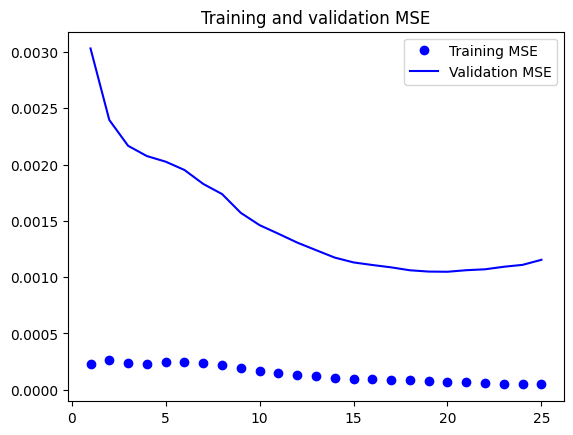

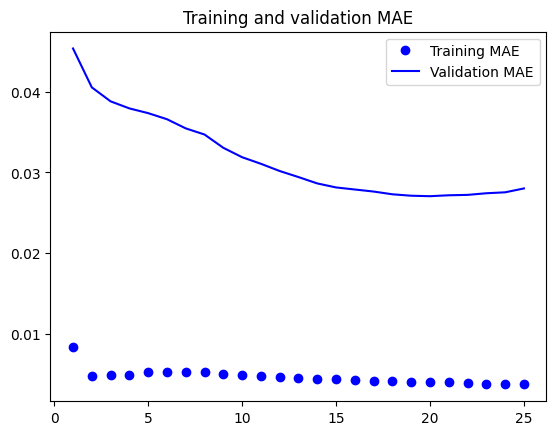

In [20]:

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MSE")
plt.plot(epochs, val_loss, "b", label="Validation MSE")
plt.title("Training and validation MSE")
plt.legend()
plt.show()
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

## 1 Day Ahead

In [21]:
# Set Parameters

# delay: time in future that will be predicted
delay = 60 * 24


# sampling rate: period between timesteps within the sequence
# Sequence with rate=1 : t1,t2...tn
# Sequence with rate=3 : t1,t3...tn*3
sampling_rate = 30

# sequence length: sequence lenght of each sample 
sequence_length = 6 * 3 * 24


# sequence_stride: period between sequences
# First sequence starts at t0
# Second sequence will start at t1 with sequence_stride=1 or at t5 with sequence_stride=5
sequence_stride = 1

#batch_size: Number of timeseries samples in each batch (except maybe the last one). 
#If None, the data will not be batched (the dataset will yield individual samples).
# Huge impact in performance.
# Tip, should be multiple of 8
batch_size = 64

# Understanding our parameters
msg = f"The timeseries will consist of batches containing {batch_size} sequences of {sequence_length} samples."

msg += f"\nFinally our target is {delay} timesteps in the future, and will have data from {sequence_length * sampling_rate} timesteps in the past"
print(msg)

train_dataset = keras.preprocessing.timeseries_dataset_from_array(
                        raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=sampling_rate,
                    sequence_stride=sequence_stride,
                    sequence_length=sequence_length,
                    shuffle=False, # Shouldn't the shuffle be set to 0?
                    seed=33,
                    batch_size=batch_size,
                    start_index=0,
                    end_index=num_train_samples)

print("Done Train")

val_dataset = keras.preprocessing.timeseries_dataset_from_array(
                    raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=sampling_rate,
                    sequence_stride=sequence_stride,
                    sequence_length=sequence_length,
                    shuffle=False,
                    seed=33,
                    batch_size=batch_size,
                    start_index=num_train_samples,
                    end_index=num_train_samples + num_val_samples)

print("Done Validation")      

test_dataset = keras.preprocessing.timeseries_dataset_from_array(
                    raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=sampling_rate,
                    sequence_stride=sequence_stride,
                    sequence_length=sequence_length,
                    shuffle=False,
                    seed=33,
                    batch_size=batch_size,
                    start_index=num_train_samples + num_val_samples)

print("Done Test")

The timeseries will consist of batches containing 64 sequences of 432 samples.
Finally our target is 1440 timesteps in the future, and will have data from 12960 timesteps in the past
Done Train
Done Validation
Done Test


In [22]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(32)(inputs) 


outputs = layers.Dense(1)(x) #simoidal #con n clases neurnas y funcion softmax
model = keras.Model(inputs, outputs)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

callbacks = [
    keras.callbacks.ModelCheckpoint("models/lstm",
   save_best_only=True) 
]

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

history = model.fit(train_dataset,
                    epochs=100,
                    validation_data=val_dataset,
                    callbacks=[callbacks, early_stopping])

# Save the trained model to a file
model.save('lstm_model_24_ahead.h5')

2023-05-13 00:51:21.095902: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-13 00:51:21.097797: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-13 00:51:21.099154: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/100


2023-05-13 00:51:21.379469: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [409145,74]
	 [[{{node Placeholder/_0}}]]
2023-05-13 00:51:21.380021: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype double and shape [409145,1]
	 [[{{node Placeholder/_20}}]]
2023-05-13 00:51:22.159448: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/

6191/6191 [==============================] - ETA: 0s - loss: 4.6145e-04 - mae: 0.0146

2023-05-13 01:08:25.326918: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [170477,74]
	 [[{{node Placeholder/_0}}]]
2023-05-13 01:08:25.327489: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [157518]
	 [[{{node Placeholder/_8}}]]
2023-05-13 01:08:25.699388: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split

6191/6191 [==============================] - 1168s 188ms/step - loss: 4.6145e-04 - mae: 0.0146 - val_loss: 0.0064 - val_mae: 0.0717
Epoch 2/100
6191/6191 [==============================] - ETA: 0s - loss: 3.4996e-04 - mae: 0.0073

2023-05-13 01:30:07.108352: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-13 01:30:07.110318: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-13 01:30:07.111848: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

6191/6191 [==============================] - 1161s 188ms/step - loss: 3.4996e-04 - mae: 0.0073 - val_loss: 0.0046 - val_mae: 0.0590
Epoch 3/100
6191/6191 [==============================] - ETA: 0s - loss: 4.4428e-04 - mae: 0.0067

2023-05-13 01:49:32.954339: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-13 01:49:32.956079: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-13 01:49:32.957680: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

6191/6191 [==============================] - 1165s 188ms/step - loss: 4.4428e-04 - mae: 0.0067 - val_loss: 0.0045 - val_mae: 0.0584
Epoch 4/100
6191/6191 [==============================] - 1166s 188ms/step - loss: 4.7407e-04 - mae: 0.0066 - val_loss: 0.0048 - val_mae: 0.0613
Epoch 5/100
6191/6191 [==============================] - 1151s 186ms/step - loss: 4.5761e-04 - mae: 0.0066 - val_loss: 0.0046 - val_mae: 0.0606
Epoch 6/100
6191/6191 [==============================] - ETA: 0s - loss: 4.4412e-04 - mae: 0.0066

2023-05-13 02:48:31.709486: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-13 02:48:31.711693: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-13 02:48:31.713184: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

6191/6191 [==============================] - 1165s 188ms/step - loss: 4.4412e-04 - mae: 0.0066 - val_loss: 0.0041 - val_mae: 0.0568
Epoch 7/100
6191/6191 [==============================] - 1170s 189ms/step - loss: 4.4147e-04 - mae: 0.0065 - val_loss: 0.0043 - val_mae: 0.0589
Epoch 8/100
6191/6191 [==============================] - 1160s 187ms/step - loss: 4.5275e-04 - mae: 0.0067 - val_loss: 0.0044 - val_mae: 0.0599
Epoch 9/100
6191/6191 [==============================] - 1155s 187ms/step - loss: 4.4283e-04 - mae: 0.0067 - val_loss: 0.0041 - val_mae: 0.0575
Epoch 10/100
6191/6191 [==============================] - 1132s 183ms/step - loss: 4.1833e-04 - mae: 0.0068 - val_loss: 0.0041 - val_mae: 0.0577
Epoch 11/100
6191/6191 [==============================] - ETA: 0s - loss: 4.3347e-04 - mae: 0.0069

2023-05-13 04:24:39.400963: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-13 04:24:39.402893: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-13 04:24:39.404357: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

6191/6191 [==============================] - 1150s 186ms/step - loss: 4.3347e-04 - mae: 0.0069 - val_loss: 0.0041 - val_mae: 0.0572
Epoch 12/100
6191/6191 [==============================] - 1148s 185ms/step - loss: 4.4472e-04 - mae: 0.0072 - val_loss: 0.0042 - val_mae: 0.0585
Epoch 13/100
6191/6191 [==============================] - ETA: 0s - loss: 4.2686e-04 - mae: 0.0072

2023-05-13 05:03:10.272300: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-13 05:03:10.274103: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-13 05:03:10.275550: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

6191/6191 [==============================] - 1148s 185ms/step - loss: 4.2686e-04 - mae: 0.0072 - val_loss: 0.0038 - val_mae: 0.0554
Epoch 14/100
6191/6191 [==============================] - 1153s 186ms/step - loss: 4.2189e-04 - mae: 0.0073 - val_loss: 0.0044 - val_mae: 0.0600
Epoch 15/100
6191/6191 [==============================] - 1147s 185ms/step - loss: 4.3458e-04 - mae: 0.0073 - val_loss: 0.0040 - val_mae: 0.0568
Epoch 16/100
6191/6191 [==============================] - 1160s 187ms/step - loss: 4.0811e-04 - mae: 0.0073 - val_loss: 0.0040 - val_mae: 0.0566
Epoch 17/100
6191/6191 [==============================] - 1156s 187ms/step - loss: 4.0199e-04 - mae: 0.0072 - val_loss: 0.0043 - val_mae: 0.0590
Epoch 18/100
6191/6191 [==============================] - 1164s 188ms/step - loss: 3.9356e-04 - mae: 0.0072 - val_loss: 0.0044 - val_mae: 0.0596


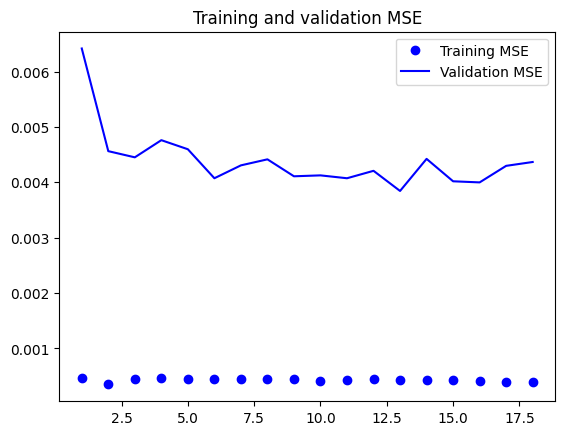

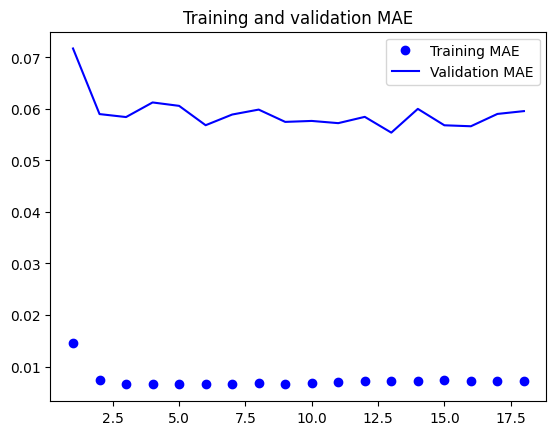

In [23]:

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MSE")
plt.plot(epochs, val_loss, "b", label="Validation MSE")
plt.title("Training and validation MSE")
plt.legend()
plt.show()
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

## 3 Days Ahead

In [24]:
# Set Parameters

# delay: time in future that will be predicted
delay = 60 * 3 * 24


# sampling rate: period between timesteps within the sequence
# Sequence with rate=1 : t1,t2...tn
# Sequence with rate=3 : t1,t3...tn*3
sampling_rate = 60

# sequence length: sequence lenght of each sample 
sequence_length = 6 * 3 * 24


# sequence_stride: period between sequences
# First sequence starts at t0
# Second sequence will start at t1 with sequence_stride=1 or at t5 with sequence_stride=5
sequence_stride = 1

#batch_size: Number of timeseries samples in each batch (except maybe the last one). 
#If None, the data will not be batched (the dataset will yield individual samples).
# Huge impact in performance.
# Tip, should be multiple of 8
batch_size = 64

# Understanding our parameters
msg = f"The timeseries will consist of batches containing {batch_size} sequences of {sequence_length} samples."

msg += f"\nFinally our target is {delay} timesteps in the future, and will have data from {sequence_length * sampling_rate} timesteps in the past"
print(msg)

train_dataset = keras.preprocessing.timeseries_dataset_from_array(
                        raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=sampling_rate,
                    sequence_stride=sequence_stride,
                    sequence_length=sequence_length,
                    shuffle=False, # Shouldn't the shuffle be set to 0?
                    seed=33,
                    batch_size=batch_size,
                    start_index=0,
                    end_index=num_train_samples)

print("Done Train")

val_dataset = keras.preprocessing.timeseries_dataset_from_array(
                    raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=sampling_rate,
                    sequence_stride=sequence_stride,
                    sequence_length=sequence_length,
                    shuffle=False,
                    seed=33,
                    batch_size=batch_size,
                    start_index=num_train_samples,
                    end_index=num_train_samples + num_val_samples)

print("Done Validation")      

test_dataset = keras.preprocessing.timeseries_dataset_from_array(
                    raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=sampling_rate,
                    sequence_stride=sequence_stride,
                    sequence_length=sequence_length,
                    shuffle=False,
                    seed=33,
                    batch_size=batch_size,
                    start_index=num_train_samples + num_val_samples)

print("Done Test")

The timeseries will consist of batches containing 64 sequences of 432 samples.
Finally our target is 4320 timesteps in the future, and will have data from 25920 timesteps in the past
Done Train
Done Validation
Done Test


In [25]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(32)(inputs) 


outputs = layers.Dense(1)(x) #simoidal #con n clases neurnas y funcion softmax
model = keras.Model(inputs, outputs)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

callbacks = [
    keras.callbacks.ModelCheckpoint("models/lstm",
   save_best_only=True) 
]

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

history = model.fit(train_dataset,
                    epochs=100,
                    validation_data=val_dataset,
                    callbacks=[callbacks, early_stopping])

# Save the trained model to a file
model.save('lstm_model_3d_ahead.h5')

2023-05-13 06:39:44.536038: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-13 06:39:44.537700: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-13 06:39:44.539065: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/100


2023-05-13 06:39:44.836698: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype double and shape [409145,1]
	 [[{{node Placeholder/_20}}]]
2023-05-13 06:39:44.837541: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype double and shape [409145,1]
	 [[{{node Placeholder/_20}}]]
2023-05-13 06:39:45.196869: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2

5988/5988 [==============================] - ETA: 0s - loss: 3.3962e-04 - mae: 0.0095

2023-05-13 06:56:27.603867: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [144558]
	 [[{{node Placeholder/_28}}]]
2023-05-13 06:56:27.604491: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [144558]
	 [[{{node Placeholder/_8}}]]
2023-05-13 06:56:27.958131: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_d

5988/5988 [==============================] - 1134s 189ms/step - loss: 3.3962e-04 - mae: 0.0095 - val_loss: 0.0058 - val_mae: 0.0687
Epoch 2/100
5988/5988 [==============================] - ETA: 0s - loss: 4.1144e-04 - mae: 0.0066

2023-05-13 07:17:10.352248: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-13 07:17:10.354145: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-13 07:17:10.355625: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

5988/5988 [==============================] - 1115s 186ms/step - loss: 4.1144e-04 - mae: 0.0066 - val_loss: 0.0056 - val_mae: 0.0677
Epoch 3/100
5988/5988 [==============================] - 1120s 187ms/step - loss: 4.3171e-04 - mae: 0.0066 - val_loss: 0.0056 - val_mae: 0.0678
Epoch 4/100
5988/5988 [==============================] - ETA: 0s - loss: 4.1233e-04 - mae: 0.0066

2023-05-13 07:54:37.582916: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-13 07:54:37.584905: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-13 07:54:37.586462: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

5988/5988 [==============================] - 1128s 188ms/step - loss: 4.1233e-04 - mae: 0.0066 - val_loss: 0.0054 - val_mae: 0.0665
Epoch 5/100
5988/5988 [==============================] - ETA: 0s - loss: 3.9336e-04 - mae: 0.0067

2023-05-13 08:13:25.900597: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-13 08:13:25.902498: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-13 08:13:25.903987: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

5988/5988 [==============================] - 1128s 188ms/step - loss: 3.9336e-04 - mae: 0.0067 - val_loss: 0.0052 - val_mae: 0.0649
Epoch 6/100
5988/5988 [==============================] - ETA: 0s - loss: 3.6402e-04 - mae: 0.0067

2023-05-13 08:32:05.802918: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-13 08:32:05.804920: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-13 08:32:05.806408: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

5988/5988 [==============================] - 1120s 187ms/step - loss: 3.6402e-04 - mae: 0.0067 - val_loss: 0.0050 - val_mae: 0.0639
Epoch 7/100
5988/5988 [==============================] - 1126s 188ms/step - loss: 3.5259e-04 - mae: 0.0068 - val_loss: 0.0051 - val_mae: 0.0644
Epoch 8/100
5988/5988 [==============================] - 1119s 187ms/step - loss: 3.4073e-04 - mae: 0.0068 - val_loss: 0.0053 - val_mae: 0.0658
Epoch 9/100
5988/5988 [==============================] - 1123s 188ms/step - loss: 3.4316e-04 - mae: 0.0068 - val_loss: 0.0052 - val_mae: 0.0650
Epoch 10/100
5988/5988 [==============================] - 1107s 185ms/step - loss: 3.4492e-04 - mae: 0.0069 - val_loss: 0.0053 - val_mae: 0.0657
Epoch 11/100
5988/5988 [==============================] - 1116s 186ms/step - loss: 3.3140e-04 - mae: 0.0068 - val_loss: 0.0053 - val_mae: 0.0655


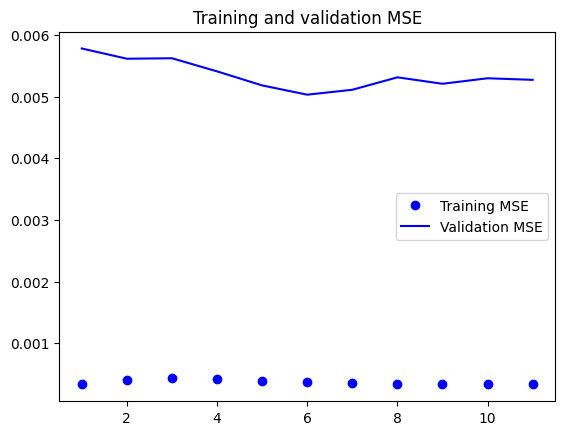

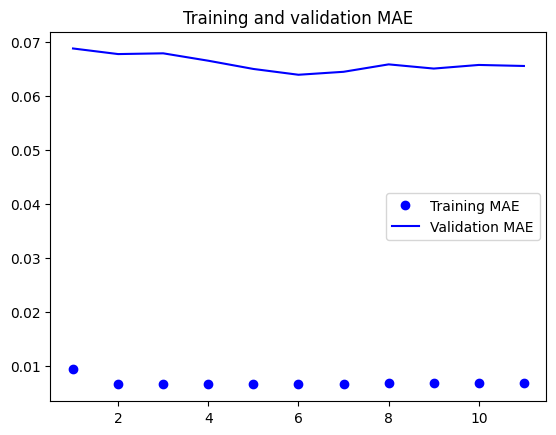

In [26]:

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MSE")
plt.plot(epochs, val_loss, "b", label="Validation MSE")
plt.title("Training and validation MSE")
plt.legend()
plt.show()
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

## 7 Days Ahead

In [27]:
# Set Parameters

# delay: time in future that will be predicted
delay = 60 * 24 * 7


# sampling rate: period between timesteps within the sequence
# Sequence with rate=1 : t1,t2...tn
# Sequence with rate=3 : t1,t3...tn*3
sampling_rate = 45

# sequence length: sequence lenght of each sample 
sequence_length =  300


# sequence_stride: period between sequences
# First sequence starts at t0
# Second sequence will start at t1 with sequence_stride=1 or at t5 with sequence_stride=5
sequence_stride = 15

#batch_size: Number of timeseries samples in each batch (except maybe the last one). 
#If None, the data will not be batched (the dataset will yield individual samples).
# Huge impact in performance.
# Tip, should be multiple of 8
batch_size = 64

# Understanding our parameters
msg = f"The timeseries will consist of batches containing {batch_size} sequences of {sequence_length} samples."

msg += f"\nFinally our target is {delay} timesteps in the future, and will have data from {sequence_length * sampling_rate} timesteps in the past"
print(msg)

train_dataset = keras.preprocessing.timeseries_dataset_from_array(
                        raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=sampling_rate,
                    sequence_stride=sequence_stride,
                    sequence_length=sequence_length,
                    shuffle=False, # Shouldn't the shuffle be set to 0?
                    seed=33,
                    batch_size=batch_size,
                    start_index=0,
                    end_index=num_train_samples)

print("Done Train")

val_dataset = keras.preprocessing.timeseries_dataset_from_array(
                    raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=sampling_rate,
                    sequence_stride=sequence_stride,
                    sequence_length=sequence_length,
                    shuffle=False,
                    seed=33,
                    batch_size=batch_size,
                    start_index=num_train_samples,
                    end_index=num_train_samples + num_val_samples)

print("Done Validation")      

test_dataset = keras.preprocessing.timeseries_dataset_from_array(
                    raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=sampling_rate,
                    sequence_stride=sequence_stride,
                    sequence_length=sequence_length,
                    shuffle=False,
                    seed=33,
                    batch_size=batch_size,
                    start_index=num_train_samples + num_val_samples)

print("Done Test")

The timeseries will consist of batches containing 64 sequences of 300 samples.
Finally our target is 10080 timesteps in the future, and will have data from 13500 timesteps in the past
Done Train
Done Validation
Done Test


In [28]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(32)(inputs) 


outputs = layers.Dense(1)(x) #simoidal #con n clases neurnas y funcion softmax
model = keras.Model(inputs, outputs)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

callbacks = [
    keras.callbacks.ModelCheckpoint("models/lstm",
   save_best_only=True) 
]

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

history = model.fit(train_dataset,
                    epochs=100,
                    validation_data=val_dataset,
                    callbacks=[callbacks, early_stopping])

# Save the trained model to a file
model.save('lstm_model_7d_ahead.h5')

2023-05-13 10:05:21.991534: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-13 10:05:21.993180: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-13 10:05:21.994549: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/100


2023-05-13 10:05:22.273304: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [26377]
	 [[{{node Placeholder/_8}}]]
2023-05-13 10:05:22.274101: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [26377]
	 [[{{node Placeholder/_8}}]]
2023-05-13 10:05:22.639254: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' 

413/413 [==============================] - ETA: 0s - loss: 0.0081 - mae: 0.0567

2023-05-13 10:06:11.412661: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]
2023-05-13 10:06:11.413229: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [10466]
	 [[{{node Placeholder/_28}}]]
2023-05-13 10:06:12.301509: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int

413/413 [==============================] - 60s 142ms/step - loss: 0.0081 - mae: 0.0567 - val_loss: 0.0133 - val_mae: 0.1090
Epoch 2/100
413/413 [==============================] - ETA: 0s - loss: 0.0020 - mae: 0.0300

2023-05-13 10:07:18.104702: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-13 10:07:18.106752: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-13 10:07:18.108269: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

413/413 [==============================] - 59s 143ms/step - loss: 0.0020 - mae: 0.0300 - val_loss: 0.0056 - val_mae: 0.0678
Epoch 3/100
413/413 [==============================] - ETA: 0s - loss: 0.0017 - mae: 0.0256

2023-05-13 10:08:19.120683: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-13 10:08:19.122614: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-13 10:08:19.124125: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

413/413 [==============================] - 61s 148ms/step - loss: 0.0017 - mae: 0.0256 - val_loss: 0.0032 - val_mae: 0.0493
Epoch 4/100
413/413 [==============================] - ETA: 0s - loss: 0.0014 - mae: 0.0237

2023-05-13 10:09:20.431953: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-13 10:09:20.433980: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-13 10:09:20.435426: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

413/413 [==============================] - 61s 147ms/step - loss: 0.0014 - mae: 0.0237 - val_loss: 0.0023 - val_mae: 0.0417
Epoch 5/100
413/413 [==============================] - ETA: 0s - loss: 0.0012 - mae: 0.0222

2023-05-13 10:10:17.986177: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-13 10:10:17.988102: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-13 10:10:17.989524: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

413/413 [==============================] - 58s 140ms/step - loss: 0.0012 - mae: 0.0222 - val_loss: 7.7243e-04 - val_mae: 0.0233
Epoch 6/100
413/413 [==============================] - ETA: 0s - loss: 0.0011 - mae: 0.0215

2023-05-13 10:11:16.030759: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-13 10:11:16.032619: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-13 10:11:16.034107: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

413/413 [==============================] - 58s 140ms/step - loss: 0.0011 - mae: 0.0215 - val_loss: 5.4972e-04 - val_mae: 0.0198
Epoch 7/100
413/413 [==============================] - 54s 131ms/step - loss: 9.9041e-04 - mae: 0.0205 - val_loss: 7.6525e-04 - val_mae: 0.0236
Epoch 8/100
413/413 [==============================] - ETA: 0s - loss: 8.5393e-04 - mae: 0.0195

2023-05-13 10:13:07.302613: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-13 10:13:07.304608: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-13 10:13:07.306084: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

413/413 [==============================] - 57s 139ms/step - loss: 8.5393e-04 - mae: 0.0195 - val_loss: 4.9109e-04 - val_mae: 0.0188
Epoch 9/100
413/413 [==============================] - ETA: 0s - loss: 7.9055e-04 - mae: 0.0191

2023-05-13 10:14:29.638991: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-13 10:14:29.641055: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-13 10:14:29.642571: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

413/413 [==============================] - 58s 141ms/step - loss: 7.9055e-04 - mae: 0.0191 - val_loss: 3.6496e-04 - val_mae: 0.0162
Epoch 10/100
413/413 [==============================] - ETA: 0s - loss: 7.4424e-04 - mae: 0.0188

2023-05-13 10:15:27.238616: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-13 10:15:27.240436: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-13 10:15:27.241878: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

413/413 [==============================] - 57s 138ms/step - loss: 7.4424e-04 - mae: 0.0188 - val_loss: 2.7166e-04 - val_mae: 0.0139
Epoch 11/100
413/413 [==============================] - ETA: 0s - loss: 7.0764e-04 - mae: 0.0183

2023-05-13 10:16:25.179069: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-13 10:16:25.180945: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-13 10:16:25.182458: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

413/413 [==============================] - 58s 141ms/step - loss: 7.0764e-04 - mae: 0.0183 - val_loss: 1.9807e-04 - val_mae: 0.0117
Epoch 12/100
413/413 [==============================] - 54s 131ms/step - loss: 6.7995e-04 - mae: 0.0181 - val_loss: 4.3697e-04 - val_mae: 0.0178
Epoch 13/100
413/413 [==============================] - ETA: 0s - loss: 6.9332e-04 - mae: 0.0182

2023-05-13 10:18:42.147896: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-13 10:18:42.149744: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-13 10:18:42.151204: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

413/413 [==============================] - 59s 142ms/step - loss: 6.9332e-04 - mae: 0.0182 - val_loss: 1.7419e-04 - val_mae: 0.0108
Epoch 14/100
413/413 [==============================] - ETA: 0s - loss: 6.4807e-04 - mae: 0.0179

2023-05-13 10:19:41.207459: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-13 10:19:41.209316: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-13 10:19:41.210823: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

413/413 [==============================] - 59s 143ms/step - loss: 6.4807e-04 - mae: 0.0179 - val_loss: 1.3016e-04 - val_mae: 0.0090
Epoch 15/100
413/413 [==============================] - 53s 129ms/step - loss: 6.3713e-04 - mae: 0.0177 - val_loss: 5.0151e-04 - val_mae: 0.0199
Epoch 16/100
413/413 [==============================] - 53s 129ms/step - loss: 6.5333e-04 - mae: 0.0179 - val_loss: 6.3251e-04 - val_mae: 0.0229
Epoch 17/100
413/413 [==============================] - 54s 130ms/step - loss: 6.4511e-04 - mae: 0.0179 - val_loss: 6.3740e-04 - val_mae: 0.0231
Epoch 18/100
413/413 [==============================] - 54s 131ms/step - loss: 6.3823e-04 - mae: 0.0178 - val_loss: 6.3518e-04 - val_mae: 0.0230
Epoch 19/100
413/413 [==============================] - 54s 131ms/step - loss: 6.3386e-04 - mae: 0.0177 - val_loss: 6.4085e-04 - val_mae: 0.0232


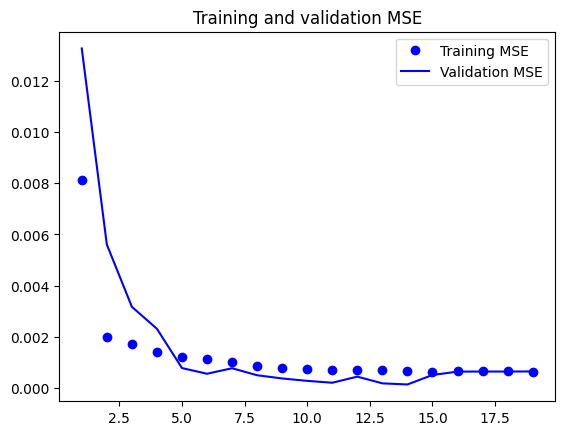

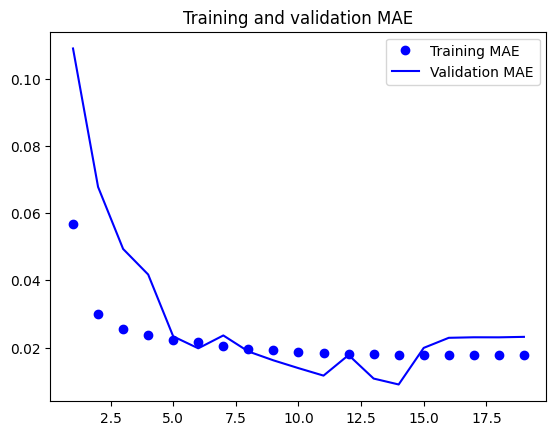

In [29]:

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MSE")
plt.plot(epochs, val_loss, "b", label="Validation MSE")
plt.title("Training and validation MSE")
plt.legend()
plt.show()
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()